In [ ]:
import sklearn as sk
import pandas as pd

df_stories = pd.read_csv('stories.csv', '\n')
df_stories.head()

processedData = list(df_stories["col"]) 

print(processedData)

['wasnt gas passed smell comparison rotten eggs reason memorable source smell coming mouth small room full people assumed someone released gas embarrassed fess real source needless say called mom come get left quickly could sure figured source gone longer smelled like', 'foul litter box whenever walked brothers apartment smell hit immediately entire living room filled smell urine feces lesser extent whole apartment smell emanated gigantic red litter pan sitting right beside entranceway unfortunately brothers roommate four adorable cats could never keep litter pan clean smell deadened senses made feel bit dizzy urine strong smelled like noxious mix chemicals smiled tried gag cats cute stink certainly didnt mention later knew fault helped drag belongings tried breathe mouth inhale eventually left room order keep retching still like cats vow never let cats litter pan stink terribly', 'cant smell tonight coworker fart office left left came window made sniffing gesture ask smelled yet acted

In [ ]:
# df_vectors = pd.read_csv('Vectors2.csv', '\t')
# df_vectors.head()

df_vectors_with_PCA = pd.read_csv('bert_embeddings_data.csv', ',') # change this file name §§§§
df_vectors = df_vectors_with_PCA.drop(['Unnamed: 0'], axis=1)

df_vectors_with_PCA.head()
# print(df_vectors.shape)GloVe_skipgram

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
0,0,-0.013444,-0.028538,0.000836,-0.023502,-0.015208,-0.025618,-0.037394,-0.018565,-0.021743,0.000269,-0.027627,-0.035164,-0.019024,0.008815,-0.027221,-0.017732,-0.033281,-0.024238,0.013896,0.017445,0.008282,-0.015082,-0.009851,-0.014154,-0.003895,-0.006929,-0.031199,-0.006549,-0.019614,-0.004645,-0.008886,-0.021949,-0.028111,0.002025,0.002760,-0.015577,-0.043014,-0.028015,-0.037346,...,-0.003795,-0.026195,0.002961,-0.011129,-0.000510,-0.015666,-0.045617,-0.017314,0.006541,-0.014215,0.008476,-0.010645,-0.015342,-0.022143,-0.005241,-0.004061,-0.030359,-0.026979,-0.007425,0.002266,-0.009585,-0.006760,0.003736,-0.011171,0.013620,0.005854,-0.013006,-0.000963,-0.042115,-0.012414,-0.008018,-0.026137,0.018221,-0.005590,-0.039162,-0.014392,-0.005569,-0.017407,-0.007949,0.003490
1,1,-0.012379,-0.026850,-0.000030,-0.028383,-0.010527,-0.023821,-0.037079,-0.015324,-0.022510,0.000276,-0.028574,-0.035651,-0.019569,0.008215,-0.030222,-0.016341,-0.033166,-0.025355,0.011203,0.015926,0.005414,-0.012560,-0.011278,-0.013892,-0.003392,-0.005792,-0.034233,-0.005225,-0.022369,-0.001786,-0.008187,-0.024041,-0.032749,0.001165,0.003804,-0.013874,-0.042095,-0.026267,-0.035686,...,-0.003960,-0.023694,0.001496,-0.010452,-0.001586,-0.017944,-0.046923,-0.020653,0.006643,-0.013769,0.009690,-0.015164,-0.015258,-0.025458,-0.000213,-0.007176,-0.025852,-0.029298,-0.006304,0.001148,-0.015360,-0.006578,0.004965,-0.009577,0.012600,0.004065,-0.013252,-0.001435,-0.044451,-0.012741,-0.005524,-0.025260,0.016276,-0.004126,-0.035324,-0.017289,-0.004247,-0.016367,-0.005247,0.004643
2,2,-0.012535,-0.025256,0.000211,-0.024174,-0.010070,-0.023981,-0.035223,-0.012968,-0.021190,-0.000358,-0.027051,-0.035807,-0.018707,0.006532,-0.028974,-0.017529,-0.032133,-0.026403,0.012228,0.016232,0.004815,-0.011512,-0.010008,-0.013906,-0.004135,-0.006625,-0.032222,-0.006549,-0.020065,-0.001699,-0.010892,-0.024243,-0.029344,0.000291,0.002653,-0.013371,-0.037473,-0.026150,-0.035933,...,-0.003052,-0.023816,0.002099,-0.009019,-0.000438,-0.014771,-0.045574,-0.017776,0.007145,-0.012639,0.007654,-0.012546,-0.016084,-0.023826,-0.000653,-0.007345,-0.027877,-0.026965,-0.007906,-0.000102,-0.011848,-0.005895,0.004748,-0.013259,0.011556,0.003693,-0.012839,0.001523,-0.042319,-0.011977,-0.006506,-0.024339,0.016344,-0.006942,-0.036546,-0.015559,-0.005485,-0.016244,-0.004493,0.005041
3,3,-0.013296,-0.027046,0.000773,-0.023906,-0.012463,-0.026157,-0.034511,-0.016247,-0.024660,-0.001053,-0.027319,-0.038523,-0.018372,0.008680,-0.030137,-0.015786,-0.033321,-0.022732,0.012624,0.014522,0.006419,-0.014273,-0.010629,-0.016792,-0.003948,-0.007407,-0.033075,-0.004344,-0.023157,-0.001923,-0.008971,-0.020140,-0.029643,0.000969,0.005190,-0.014184,-0.040543,-0.026690,-0.036713,...,-0.005308,-0.024745,0.002414,-0.012070,0.000127,-0.015610,-0.048047,-0.020633,0.008673,-0.010896,0.008371,-0.012336,-0.017041,-0.023670,-0.003659,-0.005336,-0.027446,-0.029123,-0.007100,0.001249,-0.013611,-0.009366,0.004744,-0.008700,0.011701,0.005584,-0.012135,-0.002245,-0.045819,-0.013501,-0.004397,-0.027234,0.016756,-0.004655,-0.038575,-0.013394,-0.005937,-0.018331,-0.006909,0.006140
4,4,-0.012670,-0.025124,0.001142,-0.025843,-0.011349,-0.024765,-0.037528,-0.014350,-0.020193,0.000121,-0.027431,-0.036188,-0.018516,0.007990,-0.029238,-0.016747,-0.032433,-0.024689,0.010988,0.016380,0.005010,-0.011096,-0.011483,-0.013765,-0.003351,-0.005567,-0.033222,-0.005836,-0.020870,-0.003913,-0.009250,-0.024518,-0.028870,0.000235,0.002857,-0.015356,-0.040147,-0.025710,-0.034966,...,-0.003571,-0.023751,0.002059,-0.006983,-0.000932,-0.017873,-0.045287,-0.020668,0.005720,-0.014572,0.009907,-0.014505,-0.016814,-0.024921,-0.000590,-0.006903,-0.027709,-0.027443,-0.004620,-0.000854,-0.0

In [ ]:
# preparing data 
# see if this needs tweaking §§§§

rows, cols = df_vectors.shape

print(rows)
print(cols)

counter = 0

allVectors = []

for row in range(rows):
  vector = []
  for col in range(cols):
    vector.append(df_vectors[str(col)][row])
  allVectors.append(vector)

print(allVectors) 

439
768


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#for visualization
import pandas as pd
wiki_lst=[]
title=[]
for story_index, data in enumerate(processedData):
    wiki_lst.append(data)
    title.append(story_index)
print("examine content")
wiki_lst

examine content


['wasnt gas passed smell comparison rotten eggs reason memorable source smell coming mouth small room full people assumed someone released gas embarrassed fess real source needless say called mom come get left quickly could sure figured source gone longer smelled like',
 'foul litter box whenever walked brothers apartment smell hit immediately entire living room filled smell urine feces lesser extent whole apartment smell emanated gigantic red litter pan sitting right beside entranceway unfortunately brothers roommate four adorable cats could never keep litter pan clean smell deadened senses made feel bit dizzy urine strong smelled like noxious mix chemicals smiled tried gag cats cute stink certainly didnt mention later knew fault helped drag belongings tried breathe mouth inhale eventually left room order keep retching still like cats vow never let cats litter pan stink terribly',
 'cant smell tonight coworker fart office left left came window made sniffing gesture ask smelled yet act

17


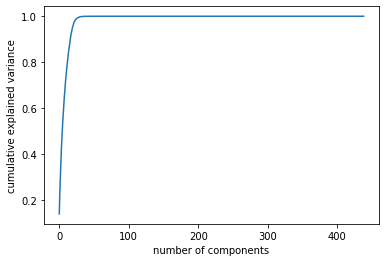

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# standardise the data
scaler = StandardScaler()
df_vectors_std = scaler.fit_transform(df_vectors_with_PCA)

# get optimal number of components 
pca = PCA()
pca.fit(df_vectors_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance'); # 45

noComponents = 0 # 0.9 is our baseline
for element in np.cumsum(pca.explained_variance_ratio_):
  noComponents = noComponents + 1
  if element >= 0.9:
    break
print(noComponents)


In [ ]:
pca = PCA(n_components=noComponents)

pca.fit(df_vectors_std)

pca.transform(df_vectors_std)

scores_pca = pca.transform(df_vectors_std)

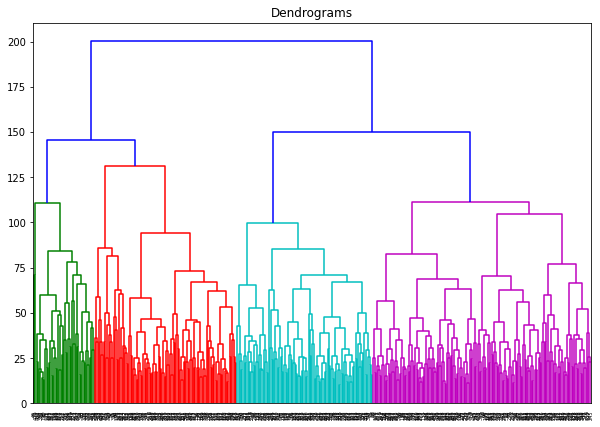

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scores_pca, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
labels = cluster.fit_predict(scores_pca)
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
labels
print(len(labels))

439


Cluster: 0
Titles


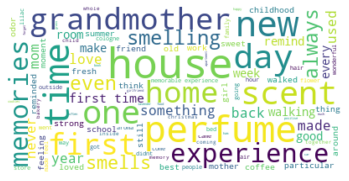

Cluster: 1
Titles


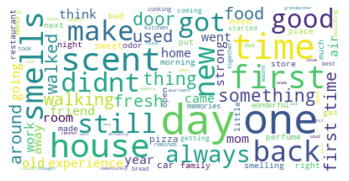

Cluster: 2
Titles


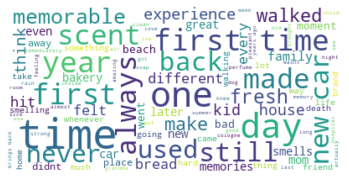

In [ ]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,3):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split() if word != "smell" and word != "smelled" and word != "really" and word != "remember"])

    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    name = "CBOW_PCA" + str(k) + ".png"
    plt.savefig(name)
    plt.show()

In [ ]:
labels
import csv
with open('HCA_BERT.csv', mode='w') as clusters:
  cluster_writer = csv.writer(clusters, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  for story_index, label in enumerate(labels): 
    cluster_writer.writerow([df_stories.iloc[story_index][0], label])

In [ ]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
labels_withPCA = cluster.fit_predict(scores_pca)

In [ ]:
silhouette_vals = silhouette_samples(scores_pca, labels_withPCA)
avg_score = np.mean(silhouette_vals)
avg_score

0.03317016696606063

In [ ]:
calinski_harabasz_val = calinski_harabasz_score(scores_pca, labels_withPCA)
calinski_harabasz_val

23.122471653907418

In [ ]:
davies_bouldin_val = davies_bouldin_score(scores_pca, labels_withPCA)
davies_bouldin_val

3.2335632827404637